# 9.3.3 An Application to Heart Disease Data

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Heart.csv',index_col=0)
print(data.shape)
data.head()

(303, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Before proceding further, i would request you go take a look at the dataset, go through the columns, what does they represent, you may this this - http://search.r-project.org/library/kmed/html/heart.html
(PS. I literally googled the types of chest pain to know more about them,LOL)

### Check for null values

In [3]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [4]:
#remove the null values
data.dropna(inplace = True)

## Enocide the categorical variables

In [5]:
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['ChestPain', 'Thal', 'AHD']

In [6]:
for col in cat_cols:
    print(col)
    print(data[col].unique())
    print()

ChestPain
['typical' 'asymptomatic' 'nonanginal' 'nontypical']

Thal
['fixed' 'normal' 'reversable']

AHD
['No' 'Yes']



In [7]:
data['ChestPain'] = data['ChestPain'].map({'typical':1, 'asymptomatic':2, 'nonanginal':3, 'nontypical':4})
data['Thal'] = data['Thal'].map({'fixed':1, 'normal':2, 'reversable':3})
data['AHD'] = data['AHD'].map({'Yes':1,'No':0})

In [8]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1,0
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2,0
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2,0


## Dividing into train and test

In [9]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('AHD',axis=1),data['AHD'],test_size = 0.3,random_state = 0)
print(X_train.shape,X_test.shape)

(207, 13) (90, 13)


## LDA

In [10]:
lda = LDA()
lda.fit(X_train,y_train)

lda_probs = lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
auc_lda = roc_auc_score(y_test, lda_probs)



## Support Vector Classifier

In [11]:
# from book : 
# svc is eqvivalen to svm with a polynomial kerenel, and degree = 1
svc = SVC(kernel='poly',degree = 1,probability=True) #probability = True as we want the predicted probs
                                                     # which will be used to calculate fpr,tpr
svc.fit(X_train,y_train)

svc_probs = svc.predict_proba(X_test)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
auc_svc = roc_auc_score(y_test, svc_probs)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


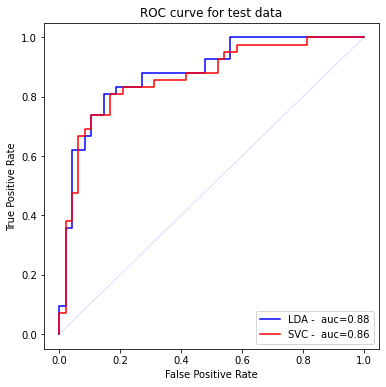

In [12]:
plt.figure(figsize = (6,6))
plt.plot(fpr_lda,tpr_lda,label="LDA -  auc="+str(auc_lda)[0:4],c = 'b')
plt.plot(fpr_svc,tpr_svc,label="SVC -  auc="+str(auc_svc)[0:4],c = 'r')
plt.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.show()

## Support Vector Machine

In [17]:
fpr_list = []
tpr_list = []
for c in [1,10,20]:
    svm = SVC(kernel='linear',probability=True,C=c)
    svm.fit(X_train,y_train)
    

    svm_probs = svm.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, svm_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

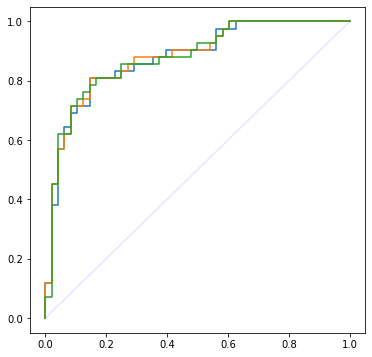

In [18]:
plt.figure(figsize = (6,6))
plt.plot(fpr_list[0],tpr_list[0],label = 'SVM gamma = 10e-3')
plt.plot(fpr_list[1],tpr_list[1],label = 'SVM gamma = 10e-2')
plt.plot(fpr_list[2],tpr_list[2],label = 'SVM gamma = 10e-1')


plt.plot([0,1],[0,1],alpha = 0.1,c = 'b')